TASK - 8

Getting the number from the Number Plate from the Input Image

Importing the Necessary Libraries

In [1]:
import cv2
import imutils
import numpy as np
from matplotlib import pyplot as plt
# import easyocr

In [2]:
img = cv2.imread( "bmw.jpg" , cv2.IMREAD_COLOR)
img = cv2.resize( img, (600,800))

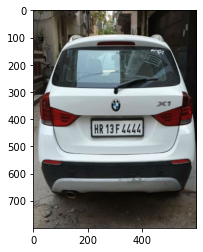

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 13 , 15 , 15)

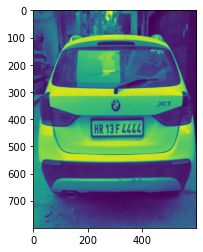

In [5]:
plt.imshow(gray)

In [6]:
edge = cv2.Canny(gray, 30, 200)
contours = cv2.findContours( edge.copy() , cv2.RETR_TREE , cv2.CHAIN_APPROX_SIMPLE )
contours = imutils.grab_contours(contours)
contours = sorted( contours, key= cv2.contourArea , reverse= True ) [:10]

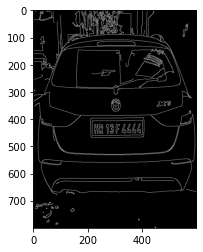

In [7]:
plt.imshow(cv2.cvtColor(edge, cv2.COLOR_BGR2RGB))

In [8]:
location = None
for cn in contours:
    approx = cv2.approxPolyDP(cn, 10, True)
    if len(approx) == 4:
        location = approx
        break


In [9]:
location

array([[[405, 397]],

       [[213, 396]],

       [[212, 465]],

       [[402, 465]]], dtype=int32)

In [10]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1,)
new_image = cv2.bitwise_and(img, img, mask= mask)


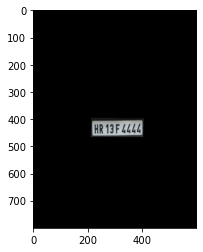

In [11]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))


In [12]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped = gray[x1:x2+1, y1:y2+1]

In [13]:
cropped

array([[ 78,  69,  57, ...,  32,  52,  79],
       [ 62,  43,  33, ...,  26,  34,  67],
       [ 43,  33,  28, ...,  26,  30,  55],
       ...,
       [ 92,  42,  38, ...,  60, 107, 148],
       [117,  56,  39, ...,  99, 128, 155],
       [149,  91,  43, ..., 127, 145, 161]], dtype=uint8)

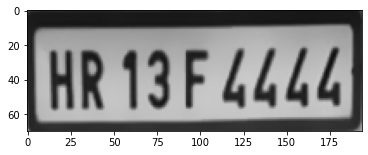

In [14]:
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))

.....

Importing easyocr library: EasyOCR is implemented using Python and the PyTorch library. If you have a CUDA-capable GPU, the underlying PyTorch deep learning library can speed up your text detection and OCR speed tremendously. As of this writing, EasyOCR can OCR text in 58 languages, including English, German, Hindi, Russian, and more! EasyOCR is actually a python package that holds PyTorch as a backend handler. EasyOCR like any other OCR(tesseract of Google or any other) detects the text from images.

In [15]:
import easyocr

In [16]:
reader = easyocr.Reader(['en']) # specify language in Reader function from easyocr lib
result = reader.readtext(cropped) # the cropped image will be detected by easyocr package from the cropped image
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
E:\Anaconda\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[4, 12], [192, 12], [192, 64], [4, 64]],
  'HR 13F LLLy',
  0.26171537679359175)]

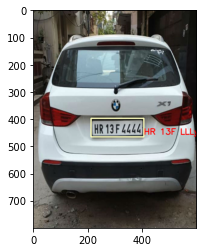

In [17]:
text = result[0][-2]
font = cv2.FONT_ITALIC
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,0,255), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (190,255,255),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))